In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information.
We begin by unzipping the meta data file and extracting its content to a list



# Reading the  data



In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'Web_and_social_media_analytics' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file which is under "Solution files" folder in "My Drive" to write the read file data into
path2 = '/content/drive/MyDrive/Solution_files/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
# creating seperate meta files and reading it and saving it under Solution_files folder
df_meta.to_csv('/content/drive/MyDrive/Solution_files/meta.csv', escapechar='|')

In [ ]:
#reading csv file from Solution_files folder
df_meta=pd.read_csv('/content/drive/MyDrive/Solution_files/meta.csv', escapechar='|')

<ipython-input-11-f250af4b7796>:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta=pd.read_csv('/content/drive/MyDrive/Solution_files/meta.csv', escapechar='|')


In [ ]:
#Reading the .csv file of the phone data into a dataframe from web_and_social_media_analytics folder

df_phonedata = pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

<ipython-input-12-0a487deca392>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/drive/MyDrive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')


In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


# Data pre-processing



In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata.head(2)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11


# EDA

In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
df_phonedata.isnull().sum() #checking for null values

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

In [ ]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [ ]:
df_phonedata.isnull().sum()

overall                  0
verified                 0
reviewerID               0
asin                     0
style                    0
reviewerName            80
reviewText             435
summary                322
unixReviewTime           0
vote                557363
image               589137
review_sentiment         0
Date&Time                0
dtype: int64

In [ ]:
df_phonedata.drop(['vote'], axis = 1, inplace = True) #dropping the columns with more null values

In [ ]:
df_phonedata.drop(['image'], axis = 1, inplace = True) #dropping the columns with more null values

In [ ]:
df_phonedata.drop(['unixReviewTime'], axis = 1, inplace = True) #dropping the columns with more null values

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10
227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,I am very satisfied with this product! It came...,Very Nice Looking Item!,POSITIVE,2014-01-31
228,5.0,True,A1SI6TJGULNBSM,961301375X,{'Color:': ' White'},Reashea Thigpen,"It works good, the light is quite bright, but ...","It works good, the light is quite bright",POSITIVE,2015-01-07
229,1.0,True,A1KGX6ZUP9BVIZ,961301375X,{'Color:': ' White'},h l m,waste of time and money. Light stays on but it...,One Star,POSITIVE,2014-12-13


In [ ]:
df_phonedata.shape

(605241, 10)

In [ ]:
#reading meta files
df_meta.head(5)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,3,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,Puppies Faceplate Hard Case Protector for Net1...,[],[],NaN,Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,4,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,White Wolf Faceplate Protector Hard Case for S...,[],[],NaN,wirelessoutletusa,['Protect your phone with style through this A...,"['>#2,672,454 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [ ]:
df_meta.isnull().sum()

Unnamed: 0           0
category             0
tech1           583486
description          0
fit             590028
title                9
also_buy             0
image                0
tech2           589840
brand            12760
feature              0
rank                 0
also_view            0
details              0
main_cat          3386
similar_item    539140
date            544191
price           462507
asin                 0
dtype: int64

In [ ]:
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True) #dropping columns with null values in meta

In [ ]:
df_meta1=df_meta[~df_meta['price'].isna()] #checking for null

In [ ]:
df_meta1=df_meta[~df_meta['similar_item'].isna()]

In [ ]:
df_meta1=df_meta[~df_meta['brand'].isna()]

In [ ]:
df_meta.price.value_counts()

$7.99      6293
$9.99      6204
$6.99      5131
$8.99      4384
$14.99     3728
           ... 
$19.54        1
$65.24        1
$100.60       1
$23.30        1
$75.24        1
Name: price, Length: 4668, dtype: int64

In [ ]:
df_meta.similar_item.value_counts()

 class="a-bordered a-horizontal-stripes  a-spacing-extra-large a-size-base comparison_table">\n\n\n\n            \n            \n            \n            \n            \n            <tr class="comparison_table_image_row">\n                <td class="comparison_table_first_col"></td>\n\n\n                <th class="comparison_image_title_cell" role="columnheader">\n                    <div class="a-row a-spacing-top-micro">\n                        <center>\n                             <img alt="Galaxy S6 Case, EpicGadget(TM) Bling 3D Handmade Luxury I Love You Heart Chain Diamond Case Cover for Samsung Galaxy S6 + HD Clear Galaxy S6 VI Screen Protector (US Seller!!)" src="https://images-na.ssl-images-amazon.com/images/I/510KzkpjwBL._SL500_AC_SS350_.jpg" id="comparison_image">\n                        </center>\n                    </div>\n                    <div class="a-row a-spacing-top-small">\n                        <div id="comparison_title" class="a-section a-spacing-none">\n

In [ ]:
#dropping duplicates in ASIN

df_meta.drop_duplicates(subset='asin',inplace=True)

In [ ]:
mask=df_meta["category"].apply(lambda x:x[31:35]=="Cell")

In [ ]:
df_meta=df_meta[mask]
df_meta.head(2)

,Unnamed: 0,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price,asin
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...","['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,8050110508
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,B00005KBGR


In [ ]:
df_meta.isnull().sum()

Unnamed: 0         0
category           0
description        0
title              0
also_buy           0
image              0
brand            123
feature            0
rank               0
also_view          0
details            0
main_cat          14
similar_item    6856
price           8046
asin               0
dtype: int64

In [ ]:
df_meta1.to_csv('/content/drive/MyDrive/Solution_files/phone_data.csv') # creating a .csv file for phone data into solution_files folder

In [ ]:
df_meta=pd.read_csv('/content/drive/MyDrive/Solution_files/phone_data.csv')# reading .csv file from solution_files folder
df_meta.head(2)

,Unnamed: 0.1,Unnamed: 0,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price,asin
0,1,1,"['Cell Phones & Accessories', 'Accessories', '...",[],La Pura VHS,[],[],Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,630524412X
1,3,3,"['Cell Phones & Accessories', 'Cases, Holsters...","['A brand-new, unused, unopened, undamaged ite...",Puppies Faceplate Hard Case Protector for Net1...,[],[],Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,6786501710


In [ ]:
# Merging phone data and meta data
reviews = pd.merge(df_phonedata, df_meta, how="inner", on=["asin"])

In [ ]:
reviews.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,...,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
1,4.0,True,AX8YW6N99IWPQ,7508492919,{'Color:': ' Bling'},eladia paz,Happy it,Four Stars,POSITIVE,2015-02-14,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
2,3.0,True,A3P9BQ6A7EO0FN,7508492919,{'Color:': ' Bling'},Susan Holt,It was a very cute phone case.,Cute Case,POSITIVE,2015-01-27,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
3,3.0,True,A2O0X4EJWLYR4W,7508492919,{'Color:': ' Bling'},Cara M Gelly,I didn't get the same case that's shown in the...,I didn't get the same case that's shown in the...,POSITIVE,2015-01-05,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
4,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10,...,[],['https://images-na.ssl-images-amazon.com/imag...,Samsung,[],"['>#483,035 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,.a-box-inner{background-color:#fff}#alohaBuyBo...


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605155 entries, 0 to 605154
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           605155 non-null  float64
 1   verified          605155 non-null  bool   
 2   reviewerID        605155 non-null  object 
 3   asin              605155 non-null  object 
 4   style             605155 non-null  object 
 5   reviewerName      605075 non-null  object 
 6   reviewText        604720 non-null  object 
 7   summary           604834 non-null  object 
 8   review_sentiment  605155 non-null  object 
 9   Date&Time         605155 non-null  object 
 10  Unnamed: 0.1      605155 non-null  int64  
 11  Unnamed: 0        605155 non-null  int64  
 12  category          605155 non-null  object 
 13  description       605155 non-null  object 
 14  title             605155 non-null  object 
 15  also_buy          605155 non-null  object 
 16  image             60

In [ ]:
reviews.to_csv('/content/drive/MyDrive/Solution_files/reviewpm.csv') #creating new .csv for merged data in Solution_files folder

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Solution_files/reviewpm.csv')
df.head(5)

,Unnamed: 0.2,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,...,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
1,1,4.0,True,AX8YW6N99IWPQ,7508492919,{'Color:': ' Bling'},eladia paz,Happy it,Four Stars,POSITIVE,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
2,2,3.0,True,A3P9BQ6A7EO0FN,7508492919,{'Color:': ' Bling'},Susan Holt,It was a very cute phone case.,Cute Case,POSITIVE,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
3,3,3.0,True,A2O0X4EJWLYR4W,7508492919,{'Color:': ' Bling'},Cara M Gelly,I didn't get the same case that's shown in the...,I didn't get the same case that's shown in the...,POSITIVE,...,[],['https://images-na.ssl-images-amazon.com/imag...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,NaN
4,4,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,...,[],['https://images-na.ssl-images-amazon.com/imag...,Samsung,[],"['>#483,035 in Cell Phones & Accessories (See ...",[],{},Cell Phones & Accessories,NaN,.a-box-inner{background-color:#fff}#alohaBuyBo...


In [ ]:
df.dtypes

Unnamed: 0.2          int64
overall             float64
verified               bool
reviewerID           object
asin                 object
style                object
reviewerName         object
reviewText           object
summary              object
review_sentiment     object
Date&Time            object
Unnamed: 0.1          int64
Unnamed: 0            int64
category             object
description          object
title                object
also_buy             object
image                object
brand                object
feature              object
rank                 object
also_view            object
details              object
main_cat             object
similar_item         object
price                object
dtype: object

In [ ]:
df1=df

In [ ]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

# Text Analytics

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Reading stop words from a text file in to a list from Web_and_social_media_analytics folder
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web_and_social_media_analytics/stop_words_long.txt')]

In [ ]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)
  df = df.dropna(axis=0, subset=['reviewText']) # dropping all NaN values from the column reviewText as well as unwanted column from dataframe
  return df


In [ ]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0).
def classify(x):
    if x == 5.0 or x==4.0: # ratings between 4-5 are positive
        return 2
    if x==3.0: #rating equal to 3 is negative
        return 1
    return 0

In [ ]:
df=clean_dataframe(df)

In [ ]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punction=[words for words in text if words not in string.punctuation]
    words_without_punction=''.join(no_punction)
    return words_without_punction

In [ ]:
def text_analysis(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english")
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [ ]:
df['reviewText']=df['reviewText'].astype('str')

In [ ]:
df=text_analysis(df)

In [ ]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

In [ ]:
df.to_excel("/content/drive/MyDrive/Solution_files/final_tableau_analysis.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis in Solution_files folder

In [ ]:
df.head(3)

,Unnamed: 0.2,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,category,also_buy,...,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews
0,0,5.0,A24E3SXTC62LJI,looks even better in person be careful to not ...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,positive,2,look even better person care drop phone often ...
1,1,4.0,AX8YW6N99IWPQ,happy it,Four Stars,POSITIVE,2015-02-14,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,positive,2,happi
2,2,3.0,A3P9BQ6A7EO0FN,it was a very cute phone case,Cute Case,POSITIVE,2015-01-27,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,ELEGANI,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,neutral,1,cute phone case


Distribution of sentiment analysis across the dataset available in drive folder

---



In [ ]:
#importing visualisation libraries
import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
from tqdm.notebook import tqdm #used as a progress bar
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

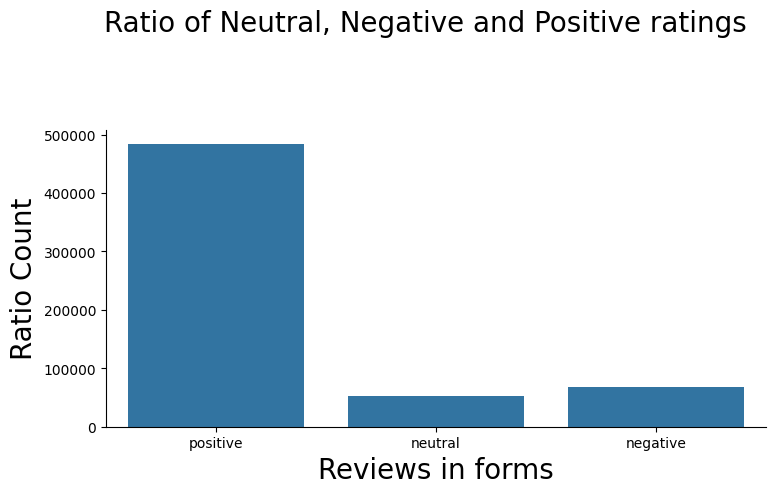

In [ ]:
#Distribution of sentiment across the dataset
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral, Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Reviews in forms", fontsize = 20)
axes.set_ylabel("Ratio Count", fontsize = 20)
sns.despine()

In [ ]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
  percentage = (len(data[data["classes"] == category]) / len(data)) * 100
  rounded_percentage = round(percentage, 2)
  return rounded_percentage
print(f"Percentage of Neutral words in train:{pert_count(df, 'neutral')} %")
print(f"Percentage of Negative words in train:{pert_count(df, 'negative')} %")
print(f"Percentage of Positive words in train:{pert_count(df, 'positive')} %")

Percentage of Neutral words in train:8.56 %
Percentage of Negative words in train:11.39 %
Percentage of Positive words in train:80.05 %


Word analysis and word count

In [ ]:
# Most repeated words in reviews
stopwords_in_text = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords_in_text,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

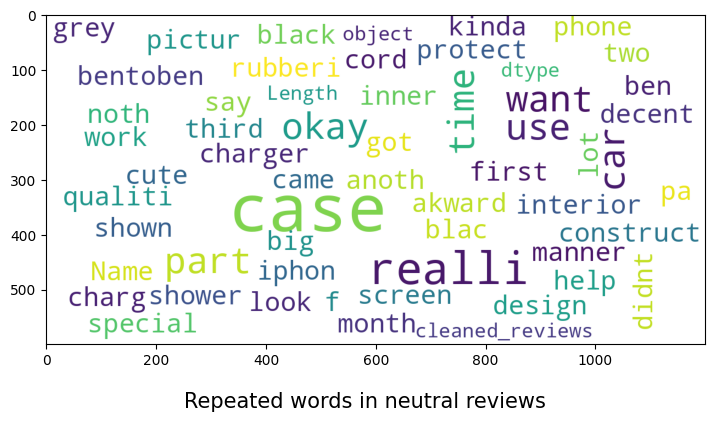

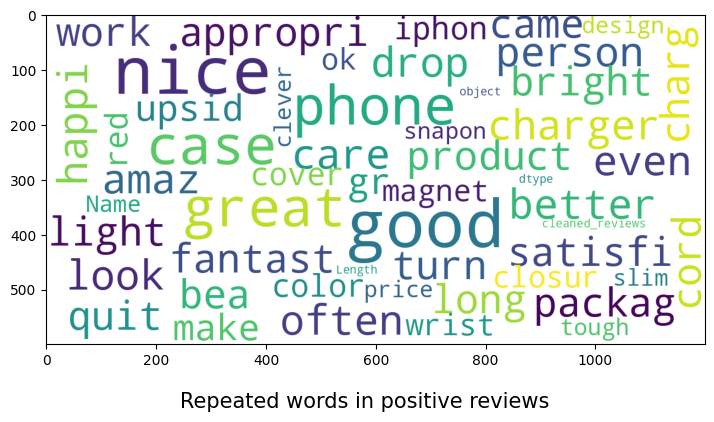

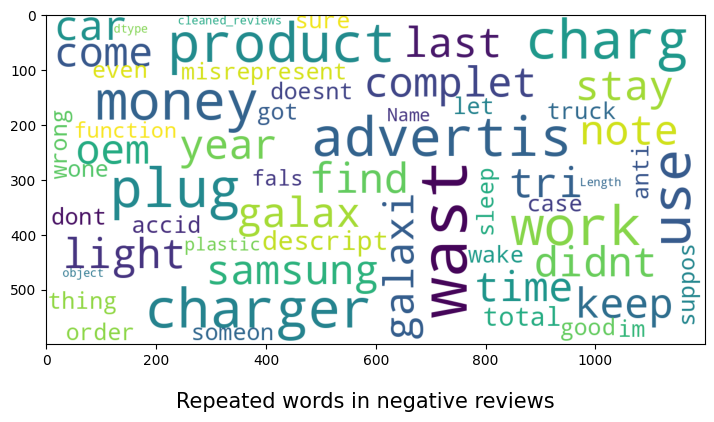

In [ ]:
# Generating wordcloud based on category
word_cloud(neu, "Repeated words in neutral reviews")
word_cloud(pos, "Repeated words in positive reviews")
word_cloud(neg, "Repeated words in negative reviews")

In [ ]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vector = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vector.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_frequency = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]# apply function above

In [ ]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,Unnamed: 0.2,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,category,also_buy,...,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews,sentiment
0,0,5.0,A24E3SXTC62LJI,looks even better in person be careful to not ...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,positive,2,look even better person care drop phone often ...,0.2
1,1,4.0,AX8YW6N99IWPQ,happy it,Four Stars,POSITIVE,2015-02-14,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,positive,2,happi,0.0
2,2,3.0,A3P9BQ6A7EO0FN,it was a very cute phone case,Cute Case,POSITIVE,2015-01-27,14,"['Cell Phones & Accessories', 'Cases, Holsters...",[],...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,neutral,1,cute phone case,0.5


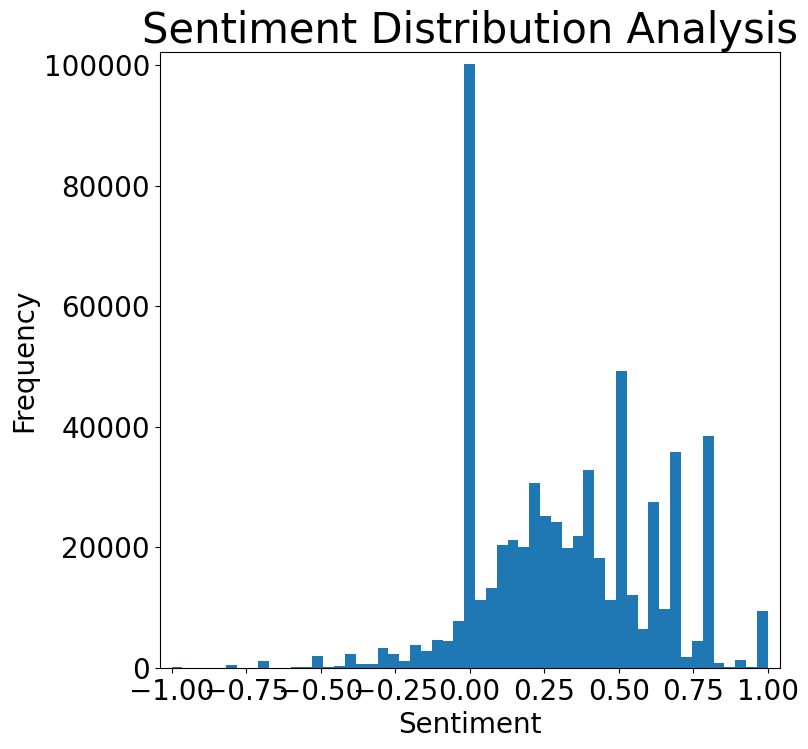

In [ ]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution Analysis', fontsize=30)
plt.show()

<ipython-input-69-8450c3cc8a68>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<Axes: >

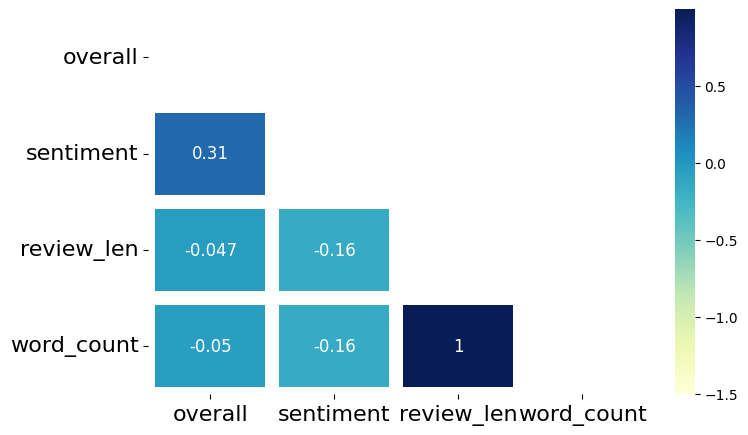

In [ ]:
#Correlation heatmap to analyse the dependence between review length and sentiment
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier #Libraries to implement and optimize Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier #To create Pipelines and select best feautures before passing through the model
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from nltk.corpus import stopwords #Pre-processing and NLP libraries
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [ ]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])

In [ ]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model_acc = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model_acc.predict(X_test_class)== Y_test_class))

Random Forest Classifier Parameters tuned

No of estimators - No. of trees - 100,

*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*   Cost complexity pruning paramter - 0.0(No pruning)

In [ ]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x7a5208a78b80>)),
                ('clf', RandomForestClassifier())])


In [ ]:
# Naive Bayes method

#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

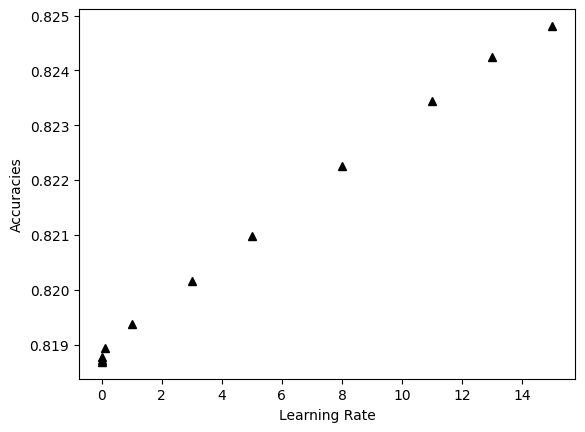

[0.818682725748226, 0.8187240299703435, 0.8187653341924611, 0.8189305510809315, 0.8193683758353779, 0.8201614169000355, 0.8209792404979637, 0.8222514105391853, 0.8234409721361717, 0.8242505348896764, 0.8248122723104756]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7a5208a78b80>)),
                ('clf', MultinomialNB(alpha=11))])
0.8234409721361717


In [ ]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7a5208a78b80>)),
                ('clf', BernoulliNB(alpha=11))])
0.7598572526083617


In [ ]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_analysis(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [ ]:
prediction("works good, viewing angle critical for good picture,the size was perfect for the location")


2

In [ ]:
df.to_csv('/content/drive/MyDrive/Solution_files/final_result_for_capstone.csv')